In [1]:
import torch
import matplotlib.pyplot as plt
import kornia as K
import torchfields
from tqdm import tqdm
import torchvision.transforms.functional as F1
from torchvision.transforms import v2

from matplotlib import pyplot as plt
import torch.nn.functional as F
from utils import viewer_3d,show_mv,plt_images,complex_pyramid,complex_NLL,complex_total_variation
from data_loader import slicing

/Users/pi58/opt/anaconda3/envs/mri_recon/lib/python3.10/site-packages/torchvision/datapoints/__init__.py:12: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Please submit any feedback you may have in this issue: https://github.com/pytorch/vision/issues/6753, and you can also check out https://github.com/pytorch/vision/issues/7319 to learn more about the APIs that we suspect might involve future changes. You can silence this warning by calling torchvision.disable_beta_transforms_warning().
  warnings.warn(_BETA_TRANSFORMS_WARNING)
/Users/pi58/opt/anaconda3/envs/mri_recon/lib/python3.10/site-packages/torchvision/transforms/v2/__init__.py:54: UserWarning: The torchvision.datapoints and torchvision.transforms.v2 namespaces are still Beta. While we do not expect major breaking changes, some APIs may still change according to user feedback. Pl

In [2]:
f_pos = torch.load('/Users/pi58/Library/CloudStorage/Box-Box/Low-Field Data/Pranav/phantom20230915/TSE3D/1/k_space.t')
f_inv = torch.load('/Users/pi58/Library/CloudStorage/Box-Box/Low-Field Data/Pranav/phantom20230915/TSE3D/2/k_space.t')


img_pos = torch.fft.ifftshift(torch.fft.ifftn(f_pos))  # Image space
# f_inv = torch.flip(f_inv,[0])
img_inv = torch.fft.ifftshift(torch.fft.ifftn(f_inv))
# img_inv = torch.flip(img_inv,[1,2])
# f_pos, f_inv, img_pos, img_inv = slicing(img_pos, img_inv)

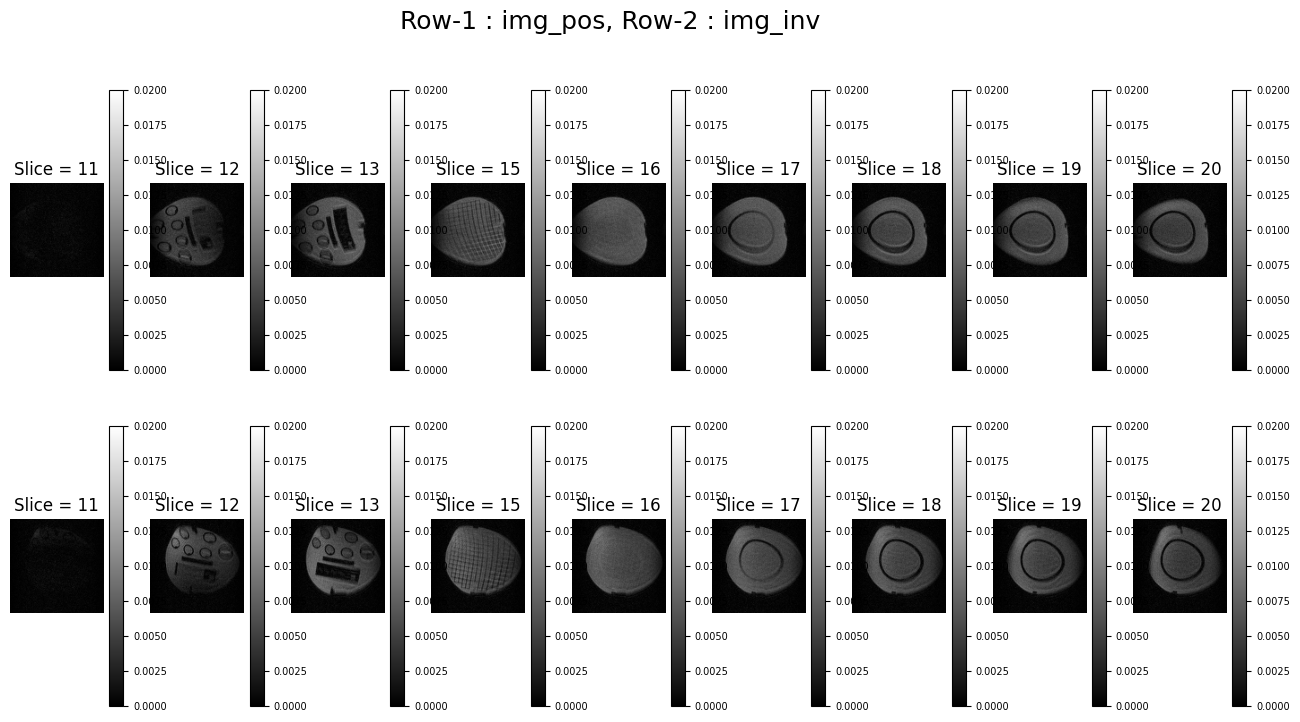

In [3]:
slices = [11,12,13,15,16,17,18,19,20]
z = [img_pos.abs(),img_inv.abs()]
plt_images(slices,z,"Row-1 : img_pos, Row-2 : img_inv",0, 0.02)

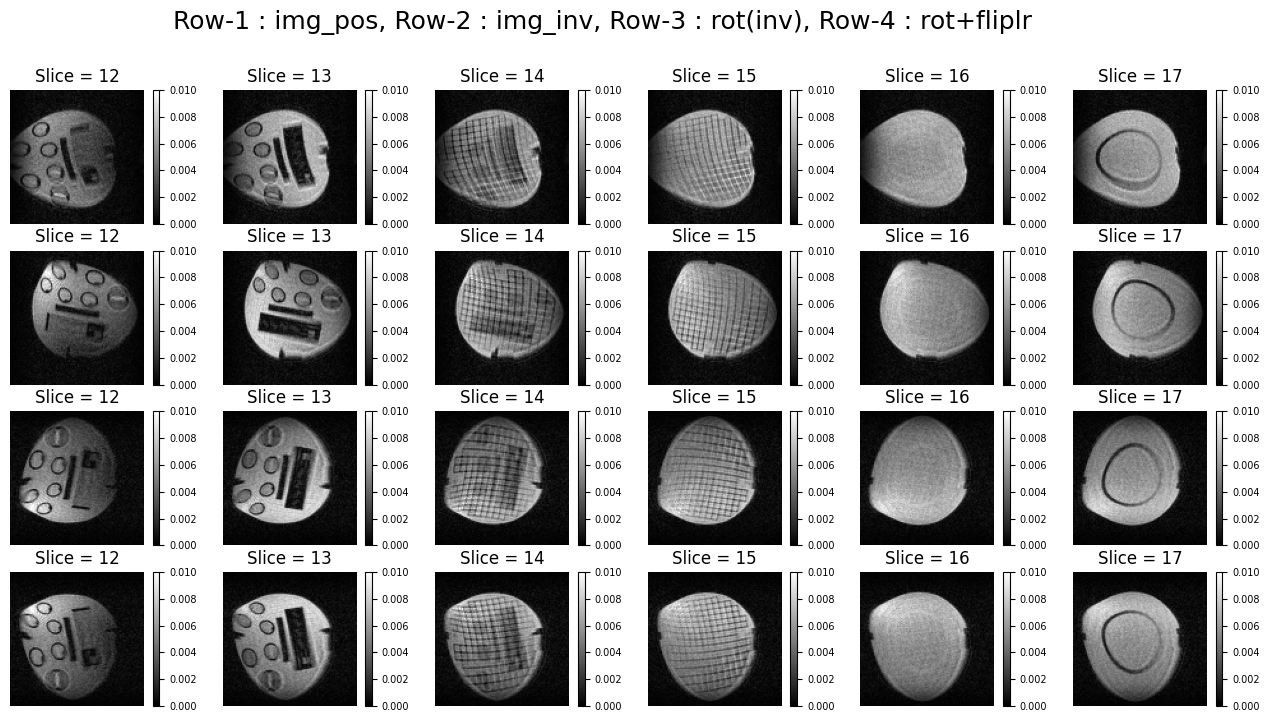

In [42]:
# rotated = F1.rotate(img_inv,90)
rotated1 = torch.rot90(img_inv, 1,[1,2])
# rotated = torch.rot90(rotated, 1,[1,2])
# rotated = torch.flip(img_inv,[1,2])
rotated2 = torch.fliplr(rotated1)

slices = [12,13,14,15,16,17]
z = [img_pos.abs(), img_inv.abs(),rotated1.abs(), rotated.abs()]
plt_images(slices,z,"Row-1 : img_pos, Row-2 : img_inv, Row-3 : rot(inv), Row-4 : rot+fliplr",0, 0.01)

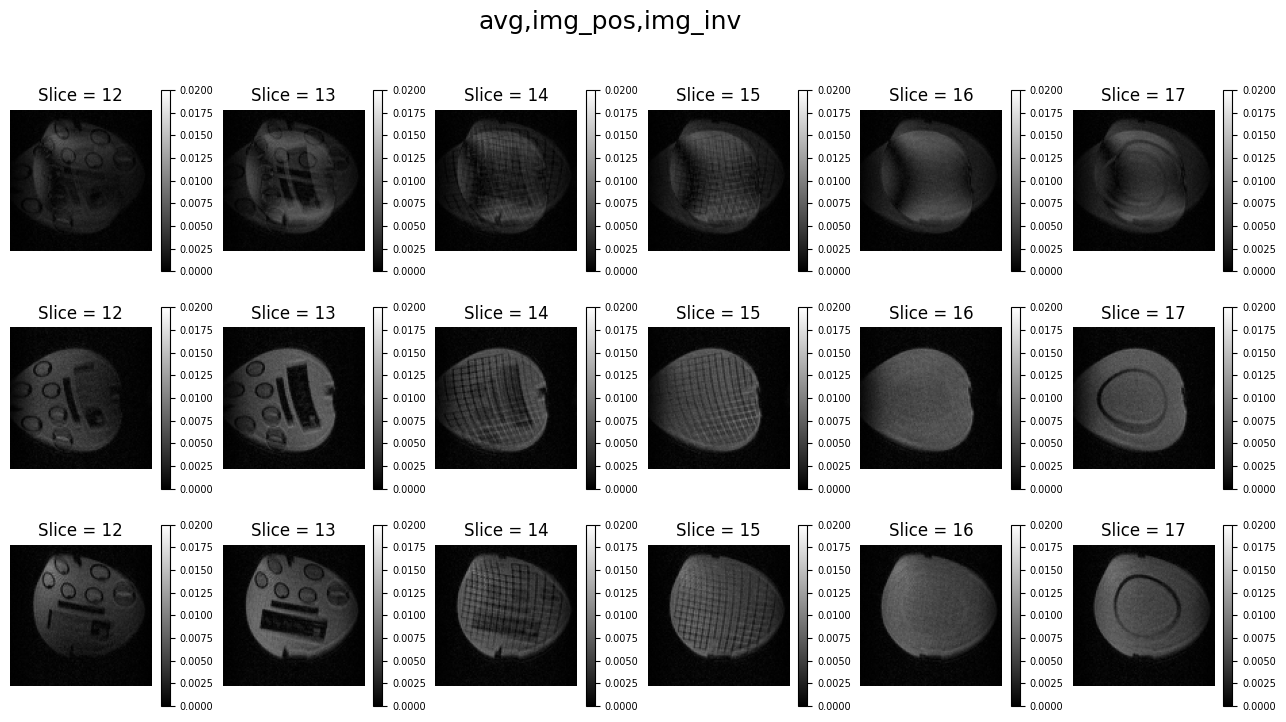

In [46]:
avg = (img_pos+img_inv)/2
plt_images(slices,[avg.abs(),img_pos.abs(),img_inv.abs()],"avg,img_pos,img_inv",0,0.02)

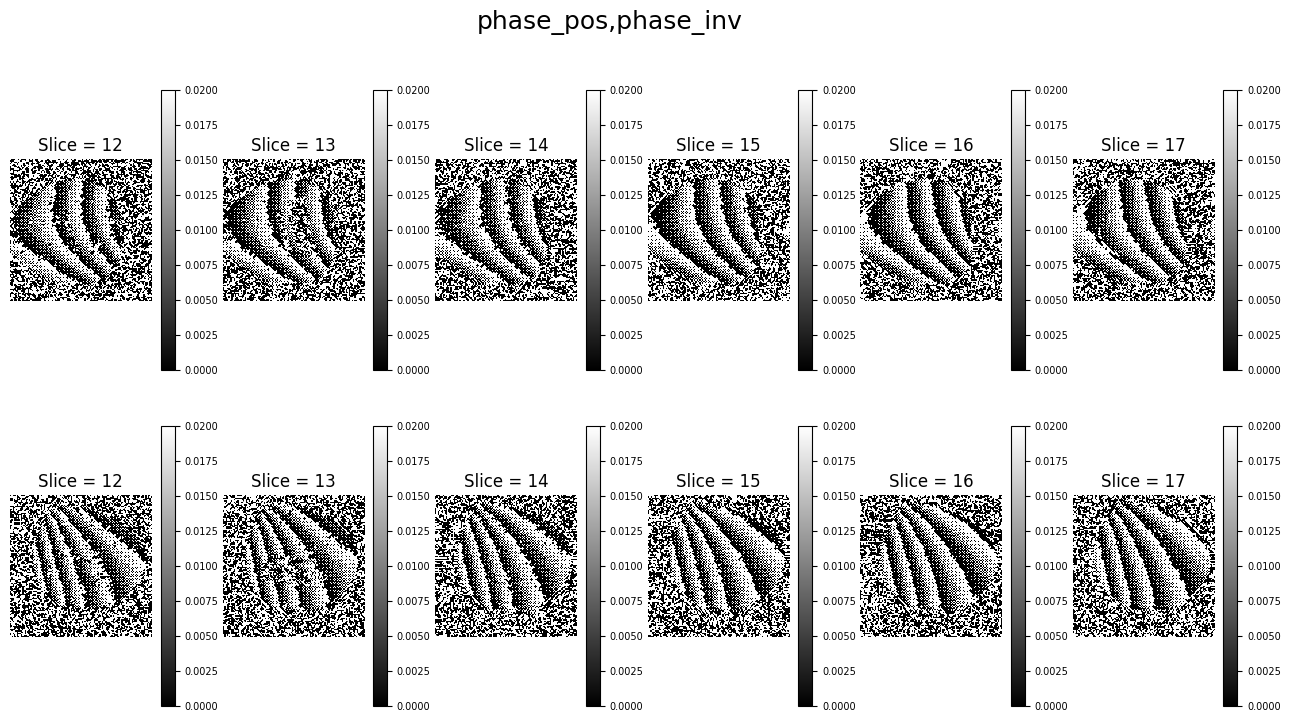

In [50]:
phase1 = (torch.atan2(torch.imag(img_pos),torch.real(img_pos)))
phase2 = (torch.atan2(torch.imag(img_inv),torch.real(img_inv)))
z = [phase1,phase2]
plt_images(slices,z,"phase_pos,phase_inv",0,0.02)

In [6]:
import napari
viewer = napari.Viewer()

# viewer, image_layer = napari.imshow(img_pos.abs(),rgb=False)

In [22]:
viewer, image_layer = napari.imshow(img_pos.abs().numpy())

<Image layer 'Image [1]' at 0x7fdb891780d0>

In [26]:
# viewer.add_image(img_inv.abs().numpy())
rotated = torch.rot90(img_inv, 1,[1,2])
viewer.add_image(rotated.abs().numpy())

<Image layer 'Image' at 0x7fdba946d900>

In [25]:
viewer2, image_layer2 = napari.imshow(img_pos.abs().numpy())

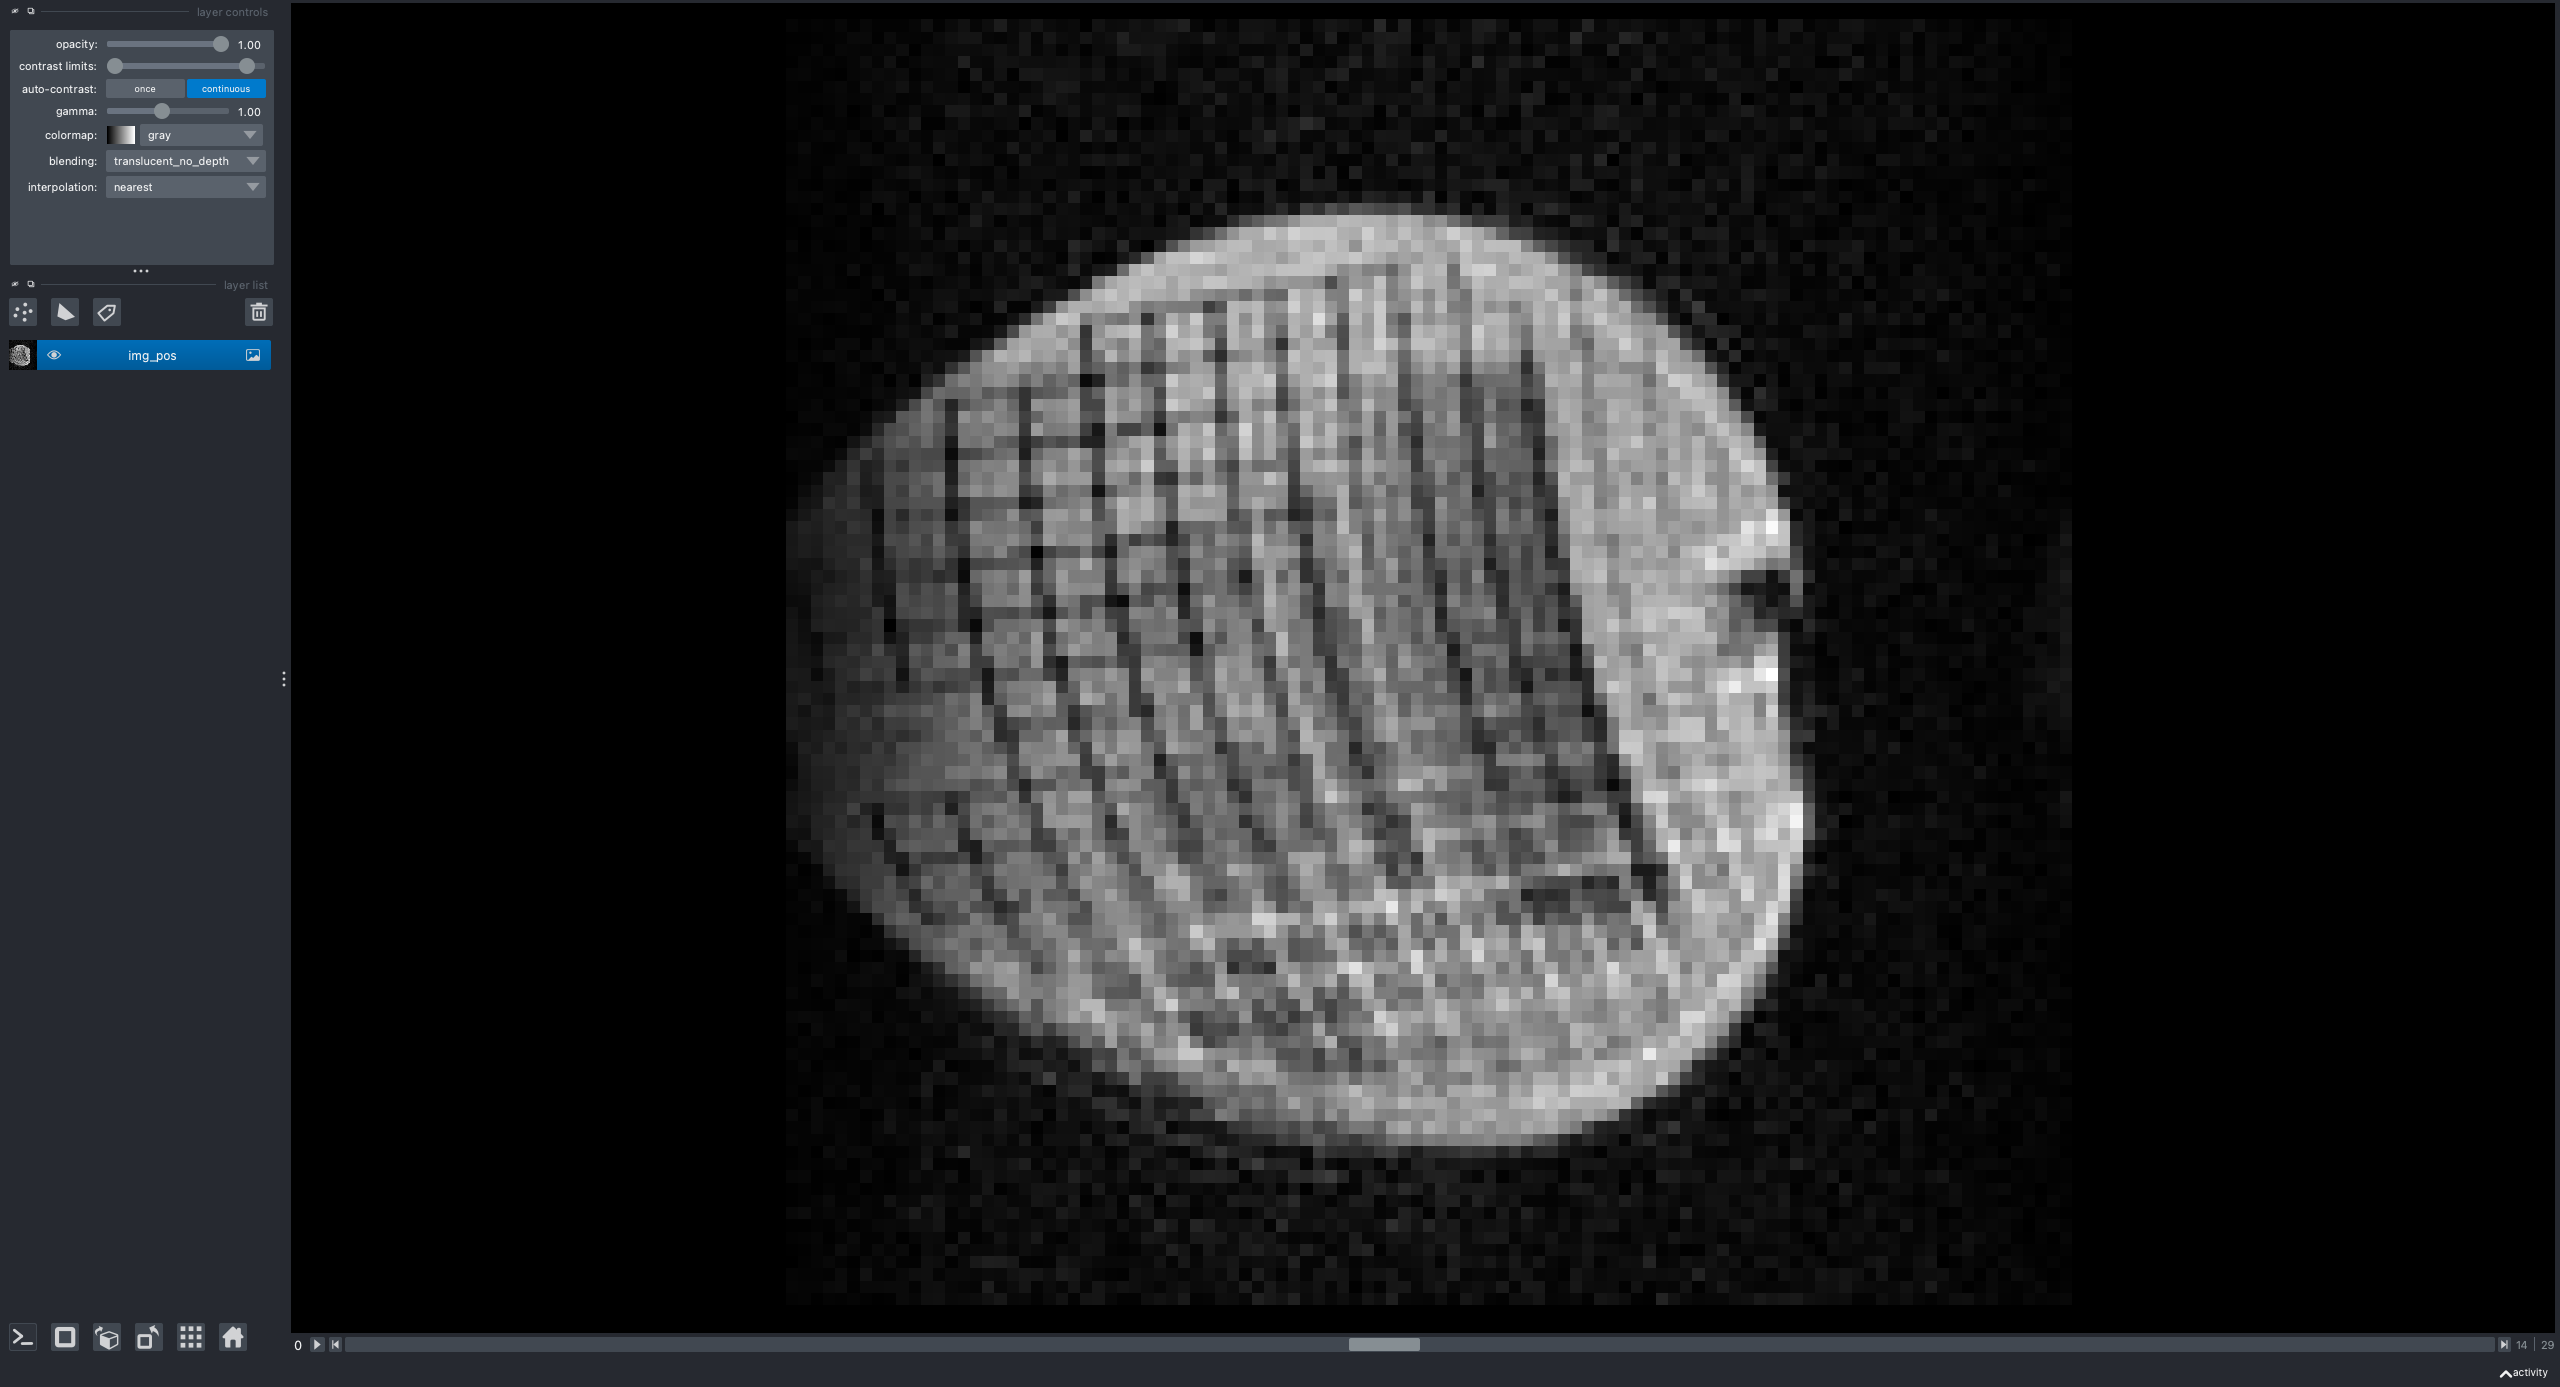

In [29]:
napari.utils.nbscreenshot(viewer2)